In [1]:
%matplotlib inline
from config_calc import *

import matplotlib
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'

import cmocean
import plot_tools
import proc_cesm_le

In [16]:
files = ['IUCN_O2ts.nc','IUCN_Tts.nc','IUCN_v5ts.nc','IUCN_v60ts.nc']
files = ['data/'+f for f in files]
ds_ts = xr.open_mfdataset(files)
ds_ts

<xarray.Dataset>
Dimensions:   (TIME1: 240)
Coordinates:
  * TIME1     (TIME1) datetime64[ns] 1861-07-01T17:02:23 1862-07-01T17:02:23 ...
Data variables:
    V5INT     (TIME1) float64 1.562e+16 1.558e+16 1.569e+16 1.571e+16 ...
    TEMP_BMA  (TIME1) float64 -0.01033 -0.009262 -0.007051 -0.007227 ...
    V50INT    (TIME1) float64 7.703e+16 7.711e+16 7.702e+16 7.711e+16 ...
    O2_BMA    (TIME1) float64 0.3345 0.3478 0.3016 0.4015 0.3821 0.3134 ...
Attributes:
    history:      FERRET V7 (opt) 19-Oct-17
    Conventions:  CF-1.6

In [22]:
ds_za = xr.merge((xr.open_dataset('data/IUCN_O2zon_2100.nc'),
                  xr.open_dataset('data/IUCN_AOUzon_2100.nc')))

ds_za['O2'] = ds_za.DO2
ds_za['AOU'] = ds_za.DAOU
v = 'O2sat'
ds_za[v] = ds_za['AOU'] + ds_za['O2']
ds_za

<xarray.Dataset>
Dimensions:   (LAT: 180, LEV: 33, bnds: 2)
Coordinates:
  * LAT       (LAT) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * LEV       (LEV) float64 0.0 10.0 20.0 30.0 50.0 75.0 100.0 125.0 150.0 ...
Dimensions without coordinates: bnds
Data variables:
    LEV_bnds  (LEV, bnds) float64 -5.0 5.0 5.0 15.0 15.0 25.0 25.0 40.0 40.0 ...
    DO2       (LEV, LAT) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    DAOU      (LEV, LAT) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    O2        (LEV, LAT) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    AOU       (LEV, LAT) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    O2sat     (LEV, LAT) float64 nan nan nan nan nan nan nan nan nan nan nan ...

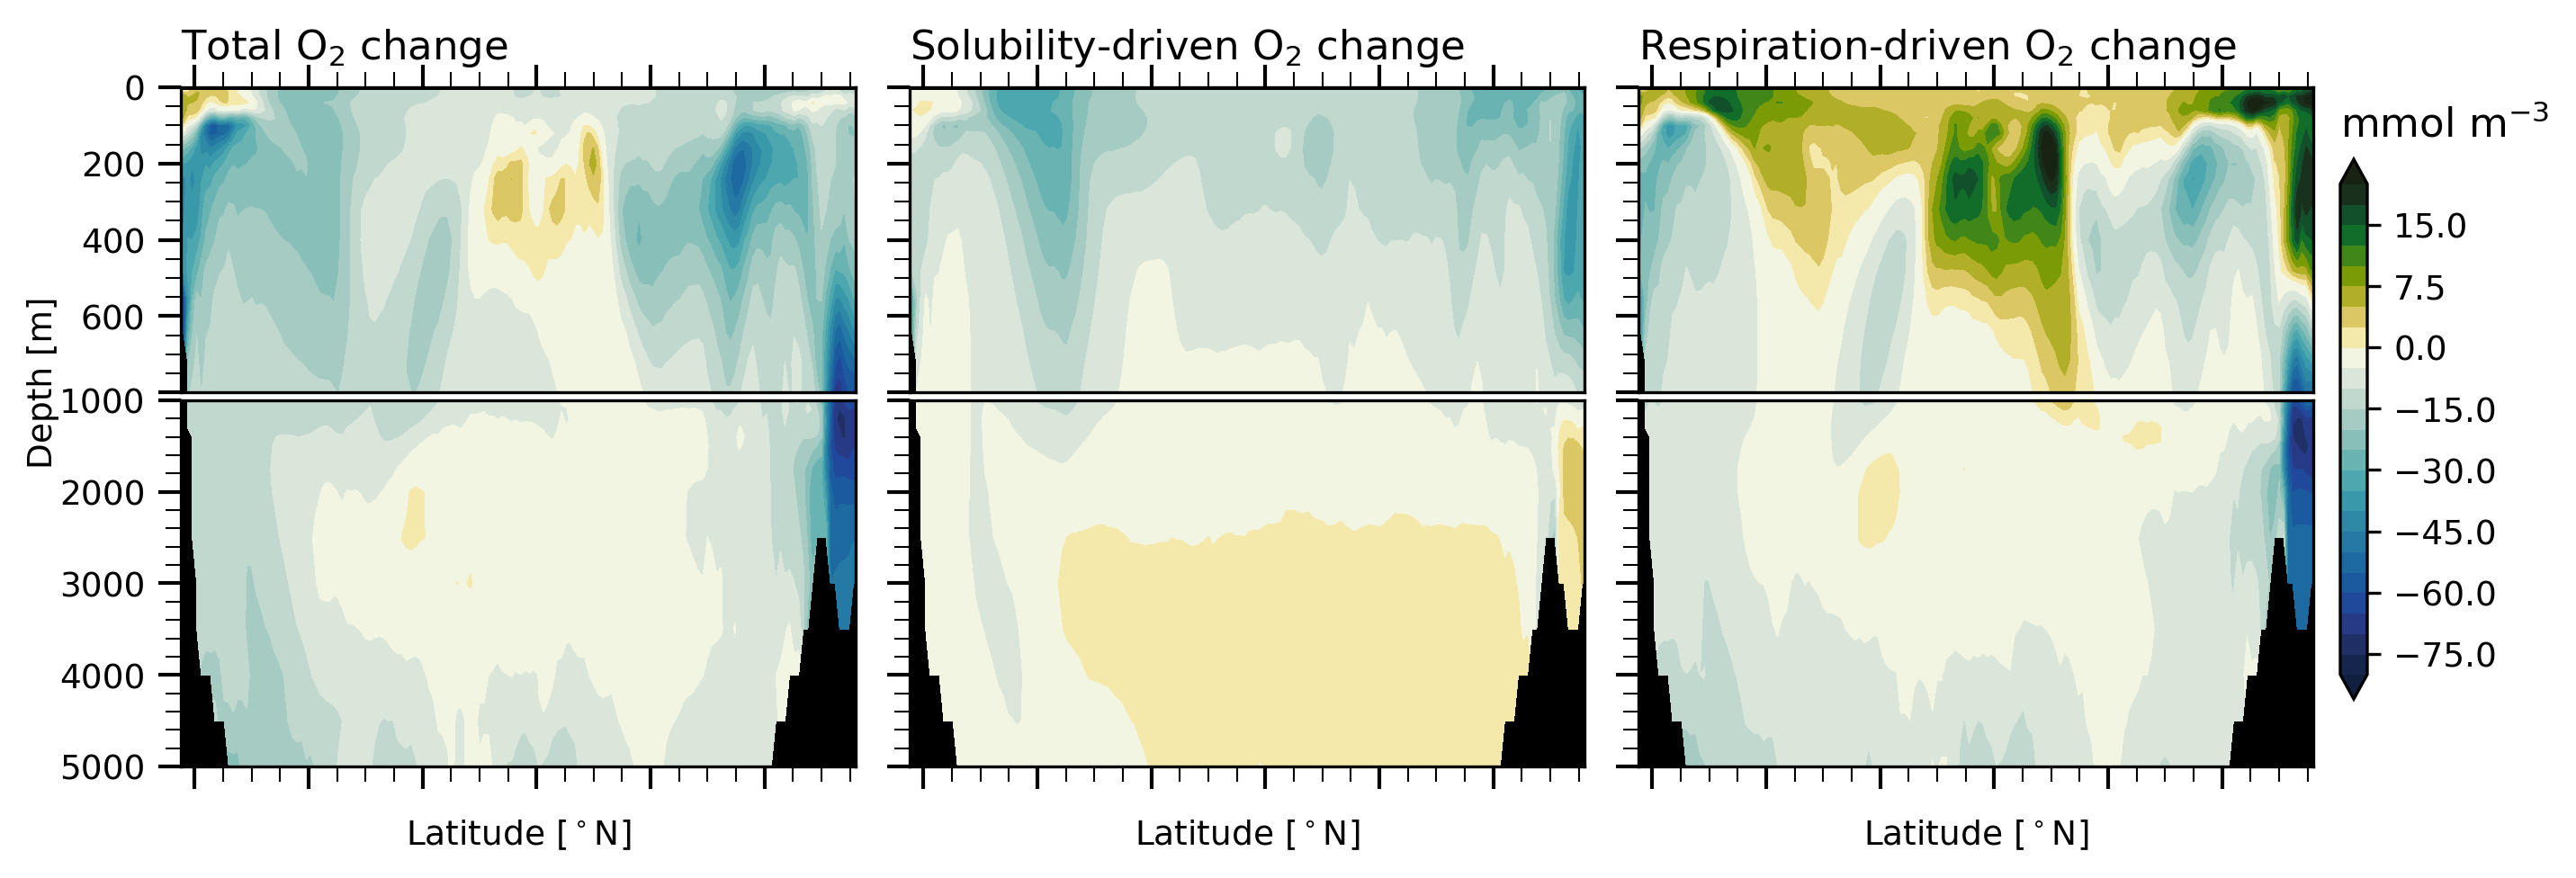

In [25]:
plot_name = os.path.join(diro['fig'],'global-zonal-mean-O2-AOU-O2sat-cmip5.pdf')

lat = ds_za['LAT']
depth = ds_za['LEV']

fig = plt.figure(dpi=300,figsize=(10,3.33333))

gs = gridspec.GridSpec(1,3)

levels = np.concatenate((np.arange(-80.,0.,5.),np.arange(0.,22.5,2.5)))
norm = plot_tools.MidPointNorm(midpoint=0.)
contour_specs = {'levels':levels,'cmap':cmocean.cm.delta,'norm':norm,'extend':'both'}

#field = np.zeros((len(depth),len(lat)))
obj = {}
for i,v in enumerate(['O2','O2sat','AOU']):
    
    field = ds_za[v][:,:]

    if v == 'AOU':
        field = -1.*field

    obj[v] = plot_tools.canvas_full_depth_section(lat,depth,field,
                                       fig = fig,
                                       gridspec_spec = gs,
                                       gridspec_index = i,
                                       contour_specs = contour_specs,
                                       xlim = [-78,70])

    if i > 0:
        [ax.set_yticklabels([]) for ax in obj[v]['ax']]
        [ax.set_ylabel('') for ax in obj[v]['ax']]

gs.update(left=0.1, right=0.89, wspace=0.08)

cbaxes = fig.add_axes([0.9, 0.2, 0.01, 0.6])
cb = fig.colorbar(obj['O2']['cf'][0], cax=cbaxes)
cbaxes.set_title('mmol m$^{-3}$',loc='left')

obj['O2']['ax'][0].set_title('Total O$_2$ change',loc='left',y=1.02)
obj['O2sat']['ax'][0].set_title('Solubility-driven O$_2$ change',loc='left',y=1.02)
obj['AOU']['ax'][0].set_title('Respiration-driven O$_2$ change',loc='left',y=1.02)
plt.savefig(plot_name,dpi=300,bbox_inches='tight')

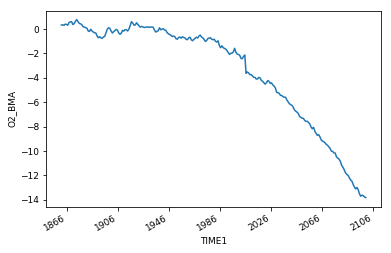

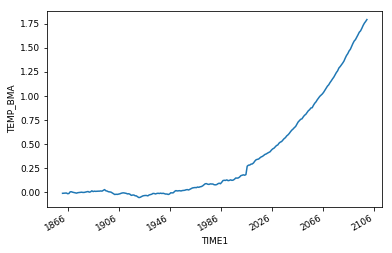

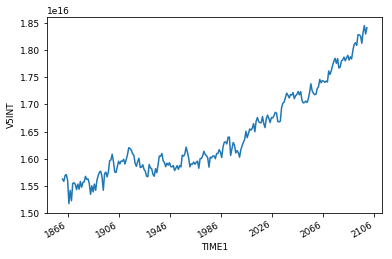

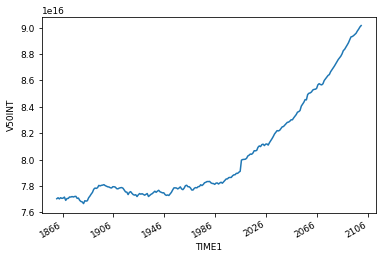

In [26]:
for v in ['O2_BMA','TEMP_BMA','V5INT','V50INT']:
    plt.figure()
    ds_ts[v].plot()

<xarray.Dataset>
Dimensions:   (LAT: 180, LEV: 33, bnds: 2)
Coordinates:
  * LAT       (LAT) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * LEV       (LEV) float64 0.0 10.0 20.0 30.0 50.0 75.0 100.0 125.0 150.0 ...
Dimensions without coordinates: bnds
Data variables:
    LEV_bnds  (LEV, bnds) float64 -5.0 5.0 5.0 15.0 15.0 25.0 25.0 40.0 40.0 ...
    DO2       (LEV, LAT) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    DAOU      (LEV, LAT) float64 nan nan nan nan nan nan nan nan nan nan nan ...

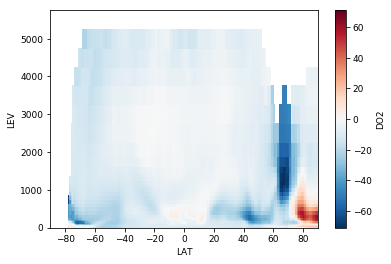

<xarray.Dataset>
Dimensions:   (LAT: 180, LEV: 33, bnds: 2)
Coordinates:
  * LAT       (LAT) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * LEV       (LEV) float64 0.0 10.0 20.0 30.0 50.0 75.0 100.0 125.0 150.0 ...
Dimensions without coordinates: bnds
Data variables:
    LEV_bnds  (LEV, bnds) float64 -5.0 5.0 5.0 15.0 15.0 25.0 25.0 40.0 40.0 ...
    DAOU      (LEV, LAT) float64 nan nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    history:      FERRET V7 (opt) 19-Oct-17
    Conventions:  CF-1.6